In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from warnings import filterwarnings
filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [5]:
drive.mount('/content/drive',force_remount=True)
train_data = '/content/drive/My Drive/AI_ML/AV_Agriculture/train.csv'
Orig_df = pd.read_csv(train_data,header="infer",sep=",")
test_data = '/content/drive/My Drive/AI_ML/AV_Agriculture/test.csv'
AV_test_df = pd.read_csv(test_data,header="infer",sep=",")

Mounted at /content/drive


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from warnings import filterwarnings
filterwarnings('ignore')

## Importing Dataset



Orig_df.head()

Orig_df.isna().sum()

AV_test_df.isna().sum()

#Need to do imputation here

Orig_df.describe()

### Drop the ID from both Orig and Test

Orig_df.drop(columns='ID',inplace=True)

result=AV_test_df[['ID']]
result=result[['ID']]
#result

AV_test_df.drop(columns='ID',inplace=True)

## Estimated_Insects_Count

#sns.distplot(Orig_df['Estimated_Insects_Count']) #looks like a normal distribution , we do scaling here

## Crop_type

Orig_df['Crop_Type'].value_counts()

## Soil_type

Orig_df['Soil_Type'].value_counts()

### Lets see what happens if we merge the 	Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides) 2 to 1 as the objective is to help the farmer prevent the damage.

Orig_df['Crop_Damage'].value_counts()

Orig_df['Crop_Damage'].replace(to_replace=2, value=1, inplace=True)

Orig_df['Crop_Damage'].value_counts()

### Lets see what happens if we merge the Type of pesticides uses (1- Never, 2-Previously Used, 3-Currently Using) as the objective to figure out how crop is really affected by the pesticides.

#sns.countplot(Orig_df['Pesticide_Use_Category'],hue=Orig_df['Crop_Damage'])

#> - Pesticide use has proven to be really helpful to the Farmer as without use of Pesticide, it shows the crop has been more damaged.
#> - It also shows the previously used Pesticide were more helpful than the Cureently used ones.As the crops are more alive.but also the counts for previously used Pesticide is so much more so might be we recently changed the crop.

Orig_df['Pesticide_Use_Category'].value_counts()

#sns.countplot(Orig_df['Crop_Damage'],hue=Orig_df['Pesticide_Use_Category'])

Orig_df[Orig_df['Crop_Damage']==1]['Crop_Damage'].count()/Orig_df[Orig_df['Pesticide_Use_Category']==2]['Pesticide_Use_Category'].count()

Orig_df[Orig_df['Crop_Damage']==1]['Crop_Damage'].count()/Orig_df[Orig_df['Pesticide_Use_Category']==3]['Pesticide_Use_Category'].count()

#60% of Crops are damaged with use of Currently Using Pesticide and 22% of Crop were damaged with Previosuly used pesticide.

Orig_df['Pesticide_Use_Category'].replace(to_replace=1, value=2, inplace=True)

Orig_df['Pesticide_Use_Category'].value_counts()

## Number_Doses_Week

#sns.distplot(Orig_df['Number_Doses_Week'])

## Number_Weeks_Used

#plt.hist(Orig_df['Number_Weeks_Used'])

## Number_Weeks_Quit

#sns.distplot(Orig_df['Number_Weeks_Quit'])



#sns.countplot(Orig_df['Season'])

#Orig_df['Total'] = Orig_df['Number_Weeks_Used']+Orig_df['Number_Weeks_Quit']

#plt.hist(Orig_df['Total'])

#I will replace the missing values for Number_Weeks_Used =0 when the Number_Doses_Week=0 and Number_Weeks_Quit>75 percentile value i.e. above 16 weeks as we assume its no loner in use else will replace it by its mean value,,

Orig_df[(Orig_df['Number_Weeks_Used'].isna())  & ((Orig_df['Number_Doses_Week']==0) | (Orig_df['Number_Weeks_Quit']>16))].count() #2741 missing will be addressed. 

Orig_df.loc[(Orig_df['Number_Weeks_Used'].isna())  & ((Orig_df['Number_Doses_Week']==0) | (Orig_df['Number_Weeks_Quit']>16)),'Number_Weeks_Used'] = 0


Orig_df['Number_Weeks_Used'].isna().sum()

Orig_df['Number_Weeks_Used'].fillna(value=Orig_df['Number_Weeks_Used'].mean(),inplace=True)

Orig_df['Number_Weeks_Used'].isna().sum()

#sns.distplot(Orig_df['Number_Weeks_Used'])

#So all missing values gone now

Orig_df.head()



#We see Crop_Type,Soil_Type,Season have least correlation with the taret column

Orig_df = pd.get_dummies(Orig_df, columns=['Pesticide_Use_Category','Season'],drop_first=True)


KeyError: ignored

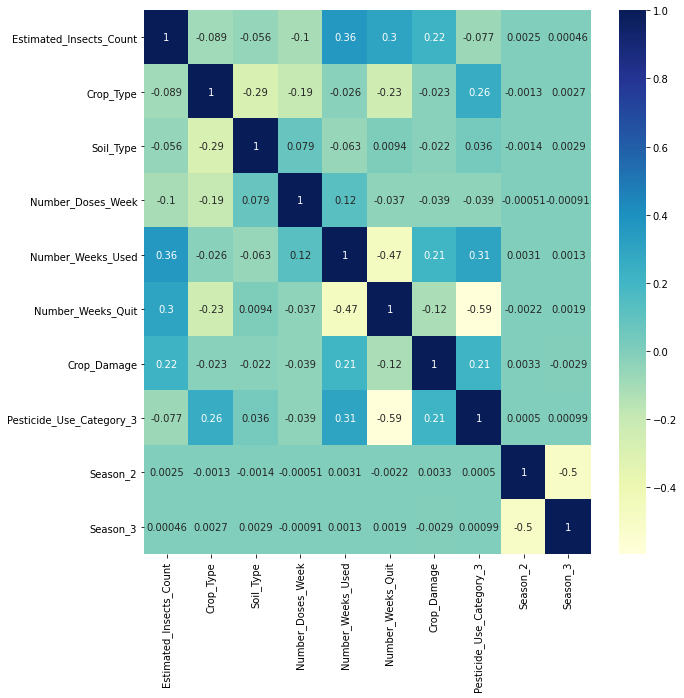

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(Orig_df.corr(),annot=True,cmap='YlGnBu')
Orig_df = pd.get_dummies(Orig_df, columns=['Pesticide_Use_Category','Season'],drop_first=True)

In [9]:
Orig_df.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit',
       'Crop_Damage', 'Pesticide_Use_Category_3', 'Season_2', 'Season_3'],
      dtype='object')

In [10]:
X = Orig_df[['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit', 'Pesticide_Use_Category_3', 'Season_2', 'Season_3']]
y = Orig_df['Crop_Damage']

In [11]:
AV_test_df = pd.get_dummies(AV_test_df, columns=['Pesticide_Use_Category','Season'],drop_first=True)

In [20]:
X_train

,Estimated_Insects_Count,Crop_Type,Soil_Type,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Pesticide_Use_Category_3,Season_2,Season_3
43097,790,1,0,35,15.000000,13,0,1,0
62169,1898,0,0,20,42.000000,9,0,0,0
13255,732,1,0,40,34.000000,0,1,1,0
50178,1297,0,1,40,27.831454,12,0,0,1
2999,489,1,0,60,23.000000,0,1,0,1
...,...,...,...,...,...,...,...,...,...
21243,1212,0,0,40,37.000000,6,0,0,0
45891,789,1,0,0,0.000000,0,0,0,0
42613,1385,0,1,20,0.000000,24,0,0,0
43567,1212,0,0,10,27.831454,0,1,1,0


In [18]:
AV_test_df

,Estimated_Insects_Count,Crop_Type,Soil_Type,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_2,Season_3
0,188,1,1,0,0.0,0,0,0,1,0
1,410,1,1,0,0.0,0,0,0,1,0
2,626,1,0,0,0.0,0,0,0,1,0
3,731,1,0,0,0.0,0,0,0,1,0
4,789,0,0,0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
59305,3337,1,0,20,34.0,12,1,0,0,0
59306,3516,1,0,20,32.0,10,1,0,1,0
59307,3702,1,0,10,0.0,48,1,0,0,0
59308,3702,1,0,10,28.0,17,1,0,1,0


In [12]:
AV_test_df.loc[(AV_test_df['Number_Weeks_Used'].isna())  & ((AV_test_df['Number_Doses_Week']==0) | (AV_test_df['Number_Weeks_Quit']>16)),'Number_Weeks_Used'] = 0

In [13]:
AV_test_df['Number_Weeks_Used'].fillna(value=AV_test_df['Number_Weeks_Used'].mean(),inplace=True)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
X_train_scale = std_scale.fit_transform(X_train)
X_test_scale = std_scale.fit_transform(X_test)
AV_test_scale = std_scale.fit_transform(AV_test_df)

## Modeling

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

classifiers = {
    "LogisiticRegression": LogisticRegression(random_state=0),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(random_state=0),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=0),
    "Naive Bayes": GaussianNB(),
    "Random Forest Classifier": RandomForestClassifier(random_state=0),
    "GradientBoostingClassifier":GradientBoostingClassifier(random_state=0),
    "AdaBoostClassifier":AdaBoostClassifier(random_state=0),
    "XGBClassifier":XGBClassifier(random_state=0)
    }

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
my_metrics = pd.DataFrame()
for key, classifier in classifiers.items():
    classifier.fit(X_train_scale,y_train)
    y_pred = classifier.predict(X_test_scale)
    testing_score = round(accuracy_score(y_test,y_pred),3)
    training_score = round(np.mean((cross_val_score(classifier, X_train_scale, y_train, cv=5))),3)
    print("Training Score for {model} is {train_score}".format(model=key,train_score=training_score))
    print("Testing Score for {model} is {test_score}".format(model=key,test_score=testing_score))
    fit = ""
    if training_score > testing_score:
        fit="Good Fit"
    else:
        fit="Overfit"
    metrics_dict = {}
    metrics_dict = {'Classifier':key,'Test Accuracy':testing_score,'Train Accuracy':training_score,'fit': fit}
    my_metrics = my_metrics.append(metrics_dict,ignore_index=True)


#my_metrics

params = {'max_depth':[3,4,5,6], 'learning_rate':np.arange(0.0,1.0,0.02), 'n_estimators':[100,200,300,400]}

xgb_model1 = XGBClassifier(random_state=0)

from sklearn.model_selection import RandomizedSearchCV

rscv = RandomizedSearchCV(xgb_model1,param_distributions=params,cv=5,scoring='accuracy')

rscv.fit(X_train_scale,y_train)

Training Score for LogisiticRegression is 0.834
Testing Score for LogisiticRegression is 0.833
Training Score for KNearest is 0.835
Testing Score for KNearest is 0.834
Training Score for Support Vector Classifier is 0.847
Testing Score for Support Vector Classifier is 0.846
Training Score for DecisionTreeClassifier is 0.769
Testing Score for DecisionTreeClassifier is 0.766
Training Score for Naive Bayes is 0.824
Testing Score for Naive Bayes is 0.824
Training Score for Random Forest Classifier is 0.836
Testing Score for Random Forest Classifier is 0.832
Training Score for GradientBoostingClassifier is 0.853
Testing Score for GradientBoostingClassifier is 0.852
Training Score for AdaBoostClassifier is 0.847
Testing Score for AdaBoostClassifier is 0.845
Training Score for XGBClassifier is 0.852
Testing Score for XGBClassifier is 0.851


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 

In [21]:
test_data = '/content/drive/My Drive/AI_ML/AV_Agriculture/test.csv'
AV_test_df = pd.read_csv(test_data,header="infer",sep=",")
AV_test_df.drop(columns='ID',inplace=True)

In [22]:
AV_test_df['Pesticide_Use_Category'].replace(to_replace=1, value=2, inplace=True)
AV_test_df = pd.get_dummies(AV_test_df, columns=['Pesticide_Use_Category','Season'],drop_first=True)
AV_test_df.loc[(AV_test_df['Number_Weeks_Used'].isna())  & ((AV_test_df['Number_Doses_Week']==0) | (AV_test_df['Number_Weeks_Quit']>16)),'Number_Weeks_Used'] = 0
AV_test_df['Number_Weeks_Used'].fillna(value=AV_test_df['Number_Weeks_Used'].mean(),inplace=True)
AV_test_scale = std_scale.fit_transform(AV_test_df)

In [23]:
y_pred_xgb = rscv.best_estimator_.predict(AV_test_scale)

In [24]:

result['Crop_Damage'] = y_pred_xgb
result = result[['ID','Crop_Damage']]

In [27]:
result.to_csv('/content/drive/My Drive/AI_ML/AV_Agriculture/AV_Agri_XGB_get_Dummies.csv',index=False)

In [28]:
import sklearn.neural_network
from sklearn.model_selection import GridSearchCV
parameter_space = {
    'hidden_layer_sizes': [(100, ),(150, )],
    'activation': ['sigmoid','relu'],
    'solver': ['adam'],
    'alpha': [0.0001,0.001],
    'learning_rate': ['constant','adaptive']
}

In [29]:
mlp_gs = sklearn.neural_network.MLPClassifier(max_iter=100)
rscv_ml = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
rscv_ml.fit(X_train_scale,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=100, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['si

In [31]:
y_pred_mlp = rscv_ml.predict(X_test_scale)
y_train_pred = rscv_ml.predict(X_train_scale)

In [32]:
accuracy_test = sklearn.metrics.accuracy_score(y_test, y_pred_mlp)
accuracy_train = sklearn.metrics.accuracy_score(y_train, y_train_pred)

In [36]:
print(accuracy_test,accuracy_train)

0.8528021607022283 0.8537264721604817


In [33]:
y_pred_Av = rscv_ml.predict(AV_test_scale)

In [34]:
result_ml=result[['ID']]
result_ml['Crop_Damage'] = y_pred_Av
result_ml = result_ml[['ID','Crop_Damage']] 

In [35]:
result_ml.to_csv('/content/drive/My Drive/AI_ML/AV_Agriculture/AV_Agri_MLP_get_Dummies.csv',index=False)

MLP without merging classes but using dummies

In [51]:
drive.mount('/content/drive',force_remount=True)
train_data = '/content/drive/My Drive/AI_ML/AV_Agriculture/train.csv'
Orig_df = pd.read_csv(train_data,header="infer",sep=",")
test_data = '/content/drive/My Drive/AI_ML/AV_Agriculture/test.csv'
AV_test_df = pd.read_csv(test_data,header="infer",sep=",")

Mounted at /content/drive


In [52]:
Orig_df.drop(columns='ID',inplace=True)

result=AV_test_df[['ID']]
result=result[['ID']]

In [53]:
AV_test_df.drop(columns='ID',inplace=True)

Orig_df['Pesticide_Use_Category'].replace(to_replace=1, value=2, inplace=True)

Orig_df['Pesticide_Use_Category'].value_counts()

Orig_df[(Orig_df['Number_Weeks_Used'].isna())  & ((Orig_df['Number_Doses_Week']==0) | (Orig_df['Number_Weeks_Quit']>16))].count() #2741 missing will be addressed. 

Orig_df.loc[(Orig_df['Number_Weeks_Used'].isna())  & ((Orig_df['Number_Doses_Week']==0) | (Orig_df['Number_Weeks_Quit']>16)),'Number_Weeks_Used'] = 0

Orig_df['Number_Weeks_Used'].fillna(value=Orig_df['Number_Weeks_Used'].mean(),inplace=True)

Orig_df = pd.get_dummies(Orig_df, columns=['Pesticide_Use_Category','Season'],drop_first=True)


In [54]:
X = Orig_df[['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit', 'Pesticide_Use_Category_3', 'Season_2', 'Season_3']]
y = Orig_df['Crop_Damage']

In [55]:
AV_test_df['Pesticide_Use_Category'].replace(to_replace=1, value=2, inplace=True)
AV_test_df = pd.get_dummies(AV_test_df, columns=['Pesticide_Use_Category','Season'],drop_first=True)

In [56]:
AV_test_df.loc[(AV_test_df['Number_Weeks_Used'].isna())  & ((AV_test_df['Number_Doses_Week']==0) | (AV_test_df['Number_Weeks_Quit']>16)),'Number_Weeks_Used'] = 0
AV_test_df['Number_Weeks_Used'].fillna(value=AV_test_df['Number_Weeks_Used'].mean(),inplace=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train_scale = std_scale.fit_transform(X_train)
X_test_scale = std_scale.fit_transform(X_test)
AV_test_scale = std_scale.fit_transform(AV_test_df)


In [62]:
X_train.head(2)

,Estimated_Insects_Count,Crop_Type,Soil_Type,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Pesticide_Use_Category_3,Season_2,Season_3
43097,790,1,0,35,15.0,13,0,1,0
62169,1898,0,0,20,42.0,9,0,0,0


In [59]:
AV_test_df.head(2)

,Estimated_Insects_Count,Crop_Type,Soil_Type,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Pesticide_Use_Category_3,Season_2,Season_3
0,188,1,1,0,0.0,0,0,1,0
1,410,1,1,0,0.0,0,0,1,0


In [60]:
Orig_df.head(2)

,Estimated_Insects_Count,Crop_Type,Soil_Type,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Damage,Pesticide_Use_Category_3,Season_2,Season_3
0,188,1,0,0,0.0,0,0,0,0,0
1,209,1,0,0,0.0,0,1,0,1,0


In [63]:
mlp_gs1 = sklearn.neural_network.MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=100, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=0,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False)

mlp_gs1.fit(X_train_scale,y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [64]:
y_pred_mlp1 = mlp_gs1.predict(X_test_scale)
y_train_pred1 = mlp_gs1.predict(X_train_scale)

In [65]:
accuracy_test = sklearn.metrics.accuracy_score(y_test, y_pred_mlp1)
accuracy_train = sklearn.metrics.accuracy_score(y_train, y_train_pred1)

In [66]:
print(accuracy_test,accuracy_train)

0.8455435516542876 0.8460034324620882


In [67]:
y_pred_Av_mlp1 = mlp_gs1.predict(AV_test_scale)

In [68]:
result_ml1=result[['ID']]
result_ml1['Crop_Damage'] = y_pred_Av_mlp1
result_ml1 = result_ml1[['ID','Crop_Damage']] 

In [69]:
result_ml1.to_csv('/content/drive/My Drive/AI_ML/AV_Agriculture/AV_Agri_MLP_get_Dummies1.csv',index=False)